### Student Performance Indicator

**Life cycle of Machine learning Project**


*   Understanding problem statement
*   Data Collection
* Data Checks to perform
*   Exploratory data analysis
*   Data Pre-Processing
*   Model Training
*   Choose Best Model


#### 1) Problem Statement
*   To understand how student performace is affected by other matrics such as Gender, Ethnicity, Parental level of eductaion, Lunch and Test preparation course.


#### 2) Data Collection
*   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
*   The data consists of 8 rows 1000 columns.


In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read csv file

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# shape of the dataset

df.shape

(1000, 8)

#### **Basic info & datacheck of the dataset**

In [ ]:
# missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### No missing values

In [ ]:
# datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# baisc stats of numerical columns

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**


*   All means are near to equal in range 68 - 69.16
*   All scores have almost equal SD in range 14.6 - 15.19
*   Math has lowest score 0 whereas reading and writing has 17 & 10 resp.
*   All of them has highest score 100




In [ ]:
# number of unique values in each columns

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
# unique values in categorical featues

cat_features = [features for features in df.columns if df[features].dtypes == 'O']

for count, features in enumerate(cat_features):
  print(f'Categories in {features} variable:    {df[features].unique()}')

Categories in gender variable:    ['female' 'male']
Categories in race/ethnicity variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:    ['standard' 'free/reduced']
Categories in test preparation course variable:    ['none' 'completed']


In [ ]:
# check duplicates

df.duplicated().sum()

0

##### No duplicates in the dataset

In [ ]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [ ]:
# Adding column Average and Total_Score

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [ ]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [ ]:
# Students with full scores in each subjects

reading_full = df[df['reading score'] == 100]['total score'].count()
writing_full = df[df['writing score'] == 100]['total score'].count()
math_full = df[df['math score'] == 100]['total score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [ ]:
reading_less_20 = df[df['reading score'] < 20]['total score'].count()
writing_less_20 = df[df['writing score'] < 20]['total score'].count()
math_less_20 = df[df['math score'] < 20]['total score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insight**


*   Students have good performance in Reading.
*   Students have bad performance in Maths.



### 4) Exploring Data (Visulatization)

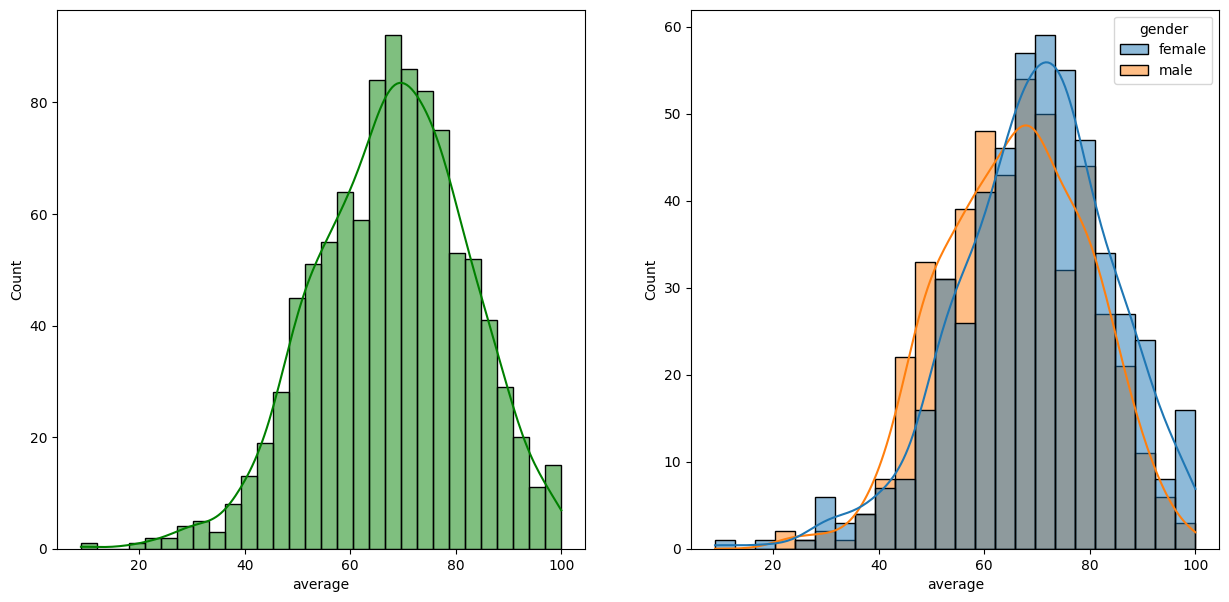

In [ ]:
# male vs female average score with histogram and kde plot

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

**Insight**
* Female tend to perform well than male.

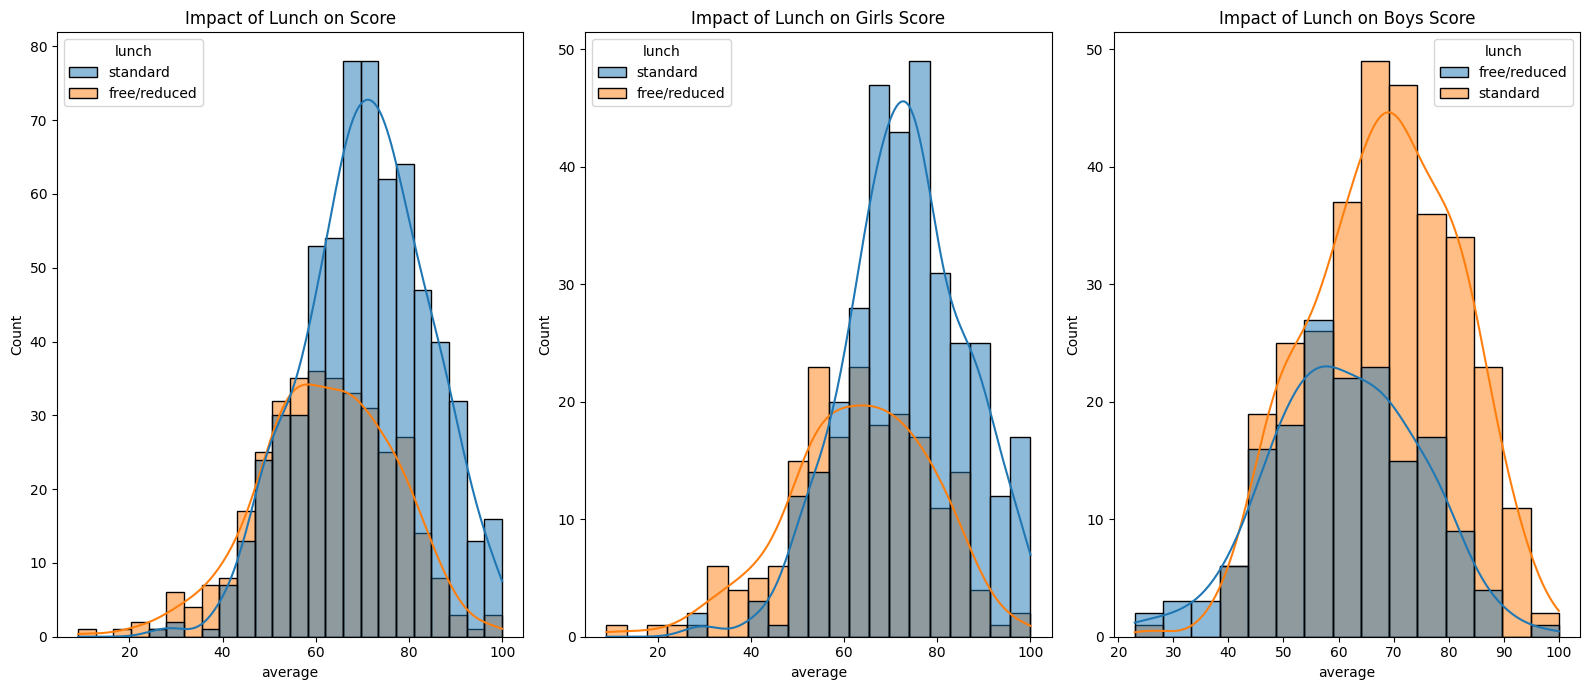

In [ ]:
# Student perforamce with launch

fig, axs = plt.subplots(1,3,figsize=(16,7))
axs = np.ravel(axs)
sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0])
axs[0].set_title('Impact of Lunch on Score')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',ax=axs[1])
axs[1].set_title('Impact of Lunch on Girls Score')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',ax=axs[2])
axs[2].set_title('Impact of Lunch on Boys Score')
plt.tight_layout()
plt.show()

**Insight**
* Standard lunch performs well in exams be it a male or female.

In [ ]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

**Insight**
* In general, parents education don't impact much in childrens eductaion. However, Bachelor Degree or Associates Degree tends to perform little well than other level.

**Insight**

In [ ]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

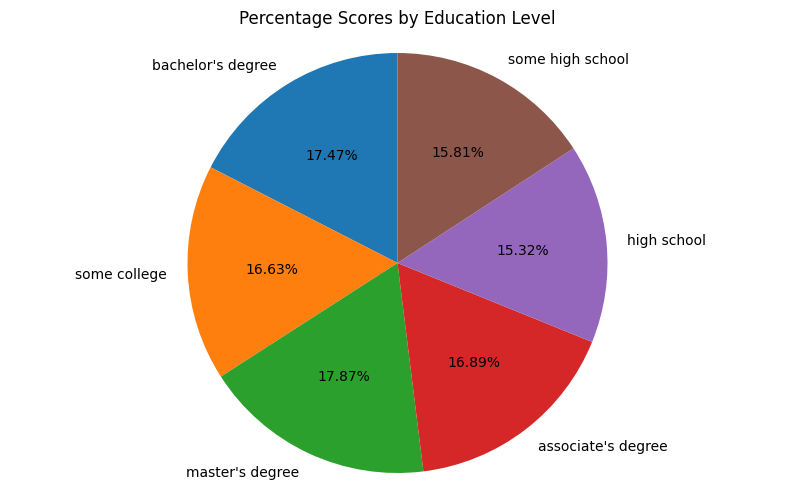

In [ ]:
# Student Performace in respect to parental education with porportion of their score in pie chart

score_mean = {}
parent_level = df['parental level of education'].unique()

for count, value in enumerate(parent_level):
  score = df[df['parental level of education'] == value]['average'].sum()
  score_mean[value] = score/len(df[df['parental level of education'] == value]['average'])

# Extracting keys and values
labels = list(score_mean.keys())
sizes = list(score_mean.values())

# Formatting sizes to two decimal places
sizes = [round(size, 2) for size in sizes]

# Plotting pie chart

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.title("Percentage Scores by Education Level")
plt.show()


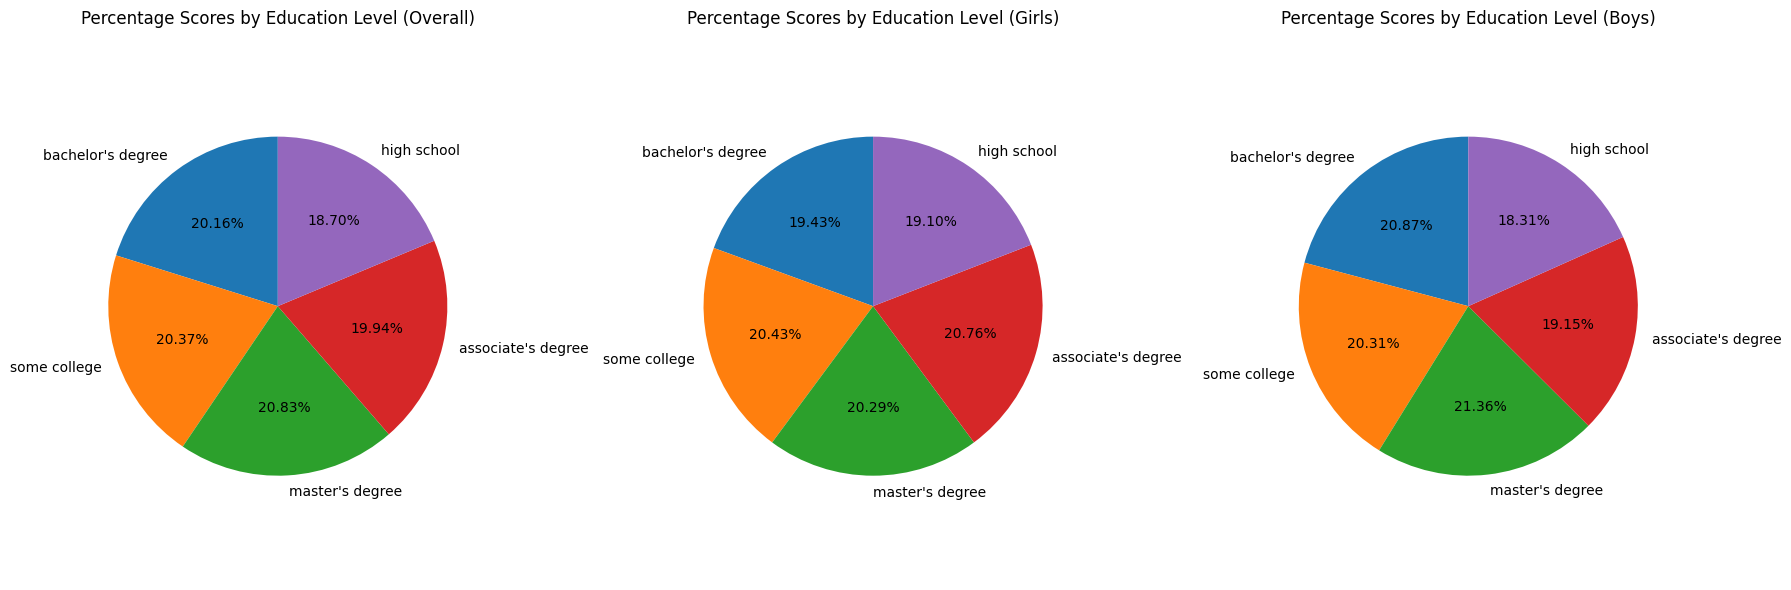

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'race/ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'] * 2,
    'parental level of education': ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school'] * 2,
    'gender': ['male', 'female'] * 5,
    'average': [71.92, 68.47, 73.59, 69.56, 63.09, 65.10, 70.00, 68.00, 66.00, 64.00]
}
df = pd.DataFrame(data)

score_mean = {}
score_mean_girl = {}
score_mean_boy = {}
parent_levels = df['parental level of education'].unique()

for value in parent_levels:
    score = df[df['parental level of education'] == value]['average'].mean()
    score_girl = df[(df['parental level of education'] == value) & (df['gender'] == 'female')]['average'].mean()
    score_boy = df[(df['parental level of education'] == value) & (df['gender'] == 'male')]['average'].mean()

    score_mean[value] = score
    score_mean_girl[value] = score_girl
    score_mean_boy[value] = score_boy

# Extracting keys and values for overall mean
labels = list(score_mean.keys())
sizes = list(score_mean.values())

# Extracting keys and values for girls' mean
labels_girl = list(score_mean_girl.keys())
sizes_girl = list(score_mean_girl.values())

# Extracting keys and values for boys' mean
labels_boy = list(score_mean_boy.keys())
sizes_boy = list(score_mean_boy.values())

# Formatting sizes to two decimal places
sizes = [round(size, 2) for size in sizes]
sizes_girl = [round(size, 2) for size in sizes_girl]
sizes_boy = [round(size, 2) for size in sizes_boy]

# Plotting pie charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Overall mean scores
ax[0].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
ax[0].axis('equal')
ax[0].set_title("Percentage Scores by Education Level (Overall)")

# Girls' mean scores
ax[1].pie(sizes_girl, labels=labels_girl, autopct='%1.2f%%', startangle=90)
ax[1].axis('equal')
ax[1].set_title("Percentage Scores by Education Level (Girls)")

# Boys' mean scores
ax[2].pie(sizes_boy, labels=labels_boy, autopct='%1.2f%%', startangle=90)
ax[2].axis('equal')
ax[2].set_title("Percentage Scores by Education Level (Boys)")

# Display the plots
plt.tight_layout()
plt.show()
